# Create a User Defined Model using astropy.modeling

## Authors
Rocio Kiman, Lia Corrales and Zé Vinícius.

## Learning Goals
* Know and understand tools to make user defined models with `astropy` and in which cases it could be useful
* Learn compound models
* Learn custom models

This tutorial assumes the student knows how to fit data using `astropy.modeling`. Check the first tutorial in case you are not familiar with it [here](https://github.com/astropy/astropy-tutorials/tree/master/tutorials/notebooks/Models-Quick-Fit).

## Keywords
Modeling, User Defined Model, Custom Models, Compound Models 

## Summary
In this tutorial, we will learn how to define a new model in two ways: with a compound model and with a custom model.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter
from astroquery.sdss import SDSS

/Users/rociokiman/anaconda3/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


### Let's fit an Emission Line from a star spectrum with `astropy.modeling` 

M dwarfs are low mass stars (Less than half of the mass of the sun). Currently we do not understand completely the physics inside low mass stars because they do not behave the same way higher mass stars do. For example, they stay magnetically active longer than higher mass stars. One way to measure magnetic activity is the height of the [$H\alpha$](https://en.wikipedia.org/wiki/H-alpha) emission line. It is located at $6563$ Angstroms at the spectrum. 

Let's search for a spectrum of an M dwarf in the Sloan Digital Sky Survey (SDSS). There are two ways of doing this:
* By hand from the SDSS database
* With astroquery

Choose one below:

#### Import Spectrum by hand

Go to this website: [SDSS database](https://dr12.sdss.org/basicSpectra). SDSS has a particular way to identify the stars it observes: it uses three numbers: Plate, Fiber and MJD (Modified Julian Date). The star we are going to use has:
* Plate: 1349
* Fiber: 216
* MJD: 52797

So go ahead, put this numbers in the website and download the fits file and save it in the same folder this tutorial is.

Once you are done, we can load the file by using the package `astropy.fits`. If you chose this way, uncomment the next line and ignore "Import Spectrum using astroquery":

In [2]:
#spectrum = fits.open('spec-1349-52797-0216.fits')

#### Import Spectrum using astroquery
Another way of importing the spectrum is using from [`astroquery.sdss`](https://astroquery.readthedocs.io/en/latest/sdss/sdss.html#module-astroquery.sdss) the [SDSSClass](http://astroquery.readthedocs.io/en/latest/api/astroquery.sdss.SDSSClass.html). We can get the spectrum using the position of the star or, like in our case, the plate, fiber and mjd.

In [3]:
spectrum = SDSS.get_spectra(plate=1349, fiberID=216, mjd=52797)[0]

/Users/rociokiman/anaconda3/lib/python3.6/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


#### Now that we have the spectrum...
One way to check what is inside the fits file `spectrum` is the following:

In [4]:
spectrum[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

To plot the spectrum we need the flux of light as a function of the wavelength (usually called lambda or $\lambda$). Note that the wavelength is in log format: loglam, so we are going to calculate $10^\lambda$ to remove this scale.

In [5]:
flux = spectrum[1].data['flux']
lam = 10**(spectrum[1].data['loglam'])

Each fits file is different according to what the person who made it icluding depending on how the observation was made. The information about the file usually is in `fitsfile[0].header`. We would like to have the units from the flux and wavelength. For SDSS spectrum we found were the units are in this [SDSS tutorial](https://www.sdss.org/dr12/tutorials/quicklook/#python):

In [6]:
#Units of the flux
units_flux = spectrum[0].header['bunit']
print(units_flux)

1E-17 erg/cm^2/s/Ang


In [7]:
#Units of the wavelegth
spectrum[0].header['WAT1_001']

'wtype=linear label=Wavelength units=Angstroms'

Now we are ready to plot the spectrum with all the information.

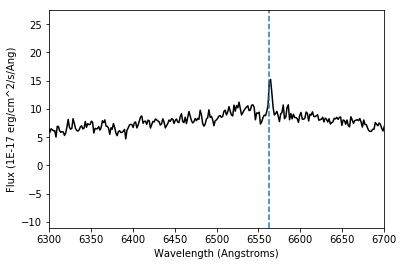

In [8]:
plt.plot(lam, flux, color='k')
plt.xlim(6300,6700)
plt.axvline(x=6563, linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

## Exercise
We just plotted our spectrum! Check different ranges of wavelength to see how the full spectrum looks like.

The blue dashed line marks the $H\alpha$ emission line. We can tell this is an active star because it has a high emission line.

Now, we would like to measure the height of this line. Let's use `astropy.modeling` to fit a gaussian to the $H\alpha$ line. We are going to initialize a gaussian model at the position of the $H\alpha$ line. The idea is that the gaussian amplitude will tell us the height of the line.

We are going to go quick over this part of the tutorial because it involves fitting with `astropy.modeling` and this was explained in a [first tutorial](https://github.com/astropy/astropy-tutorials/tree/master/tutorials/notebooks/Models-Quick-Fit). Check it out if you would like to know more about it.

In [9]:
gausian_model = models.Gaussian1D(1, 6563, 10)
fitter = fitting.LevMarLSQFitter()
gaussian_fit = fitter(gausian_model, lam, flux)

Let's plot the results.

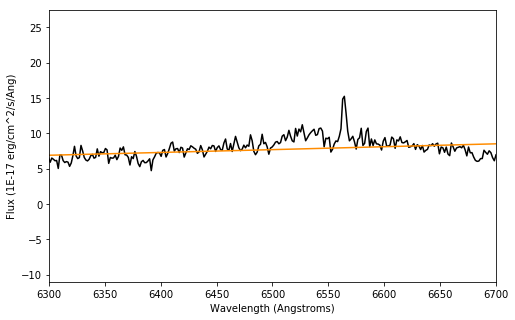

In [10]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, gaussian_fit(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

We can see the fit is not doing a good job. Let's print the parameters of this fit:

In [11]:
print(gaussian_fit)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
    ----------------- ----------------- -----------------
    16.75070628912542 9456.749530943964 2368.395706441934


## Exercise 

Go back to the previous plot and try to make the fit work. Note: **Do not spend more than 10 minutes** in this exercise. A couple of ideas to try: 
* Is it not working because of the model to fit we chose? You can find more models to use [here](http://docs.astropy.org/en/stable/modeling/#module-astropy.modeling.functional_models).
* Is it not working because of the fitter we chose?
* Is it not working because of the range of data we are fitting? 
* Is it not working because how we are plotting the data? 

# Compound models

One model is not enough to make this fit work. We need to combine a couple of models to make a [compound model](http://docs.astropy.org/en/stable/modeling/#compound-models) in `astropy`. The idea is that we can add, subtract, divide or multiply models that already exist in [`astropy.modeling`](http://docs.astropy.org/en/stable/modeling/#models-and-fitting-astropy-modeling) and fit the compound model to our data.

For our problem we are going to combine the gaussian with a polynomial of degree 1 to account for the background spectrum close to the $H\alpha$ line. Take a look at the plot we made before to convince yourself that this is the case.

Now let's make our compound model!

In [1]:
compound_model = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)

NameError: name 'models' is not defined

After this point, the algorithm to fit the data works exactly the same as before: we define a fitter and then give to the fitter the model and the data.

In [13]:
fitter = fitting.LevMarLSQFitter()
compound_fit = fitter(compound_model, lam, flux)

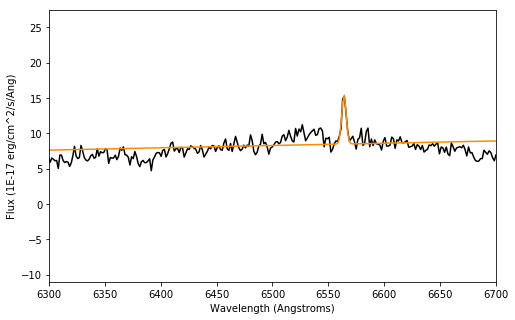

In [14]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

It works! Let's take a look to the fit we just made. 

In [15]:
print(compound_fit)

Model: CompoundModel0
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=6563., stddev=10.)>

    [1]: <Polynomial1D(1, c0=0., c1=0.)>
Parameters:
       amplitude_0           mean_0       ...         c1_1        
    ------------------ ------------------ ... --------------------
    7.0208917442781855 6564.1363171493185 ... 0.003239952053005842


Let's print all the parameters in a fancy way:

In [16]:
for x,y in zip(compound_fit.param_names, compound_fit.parameters):
    print(x,y)

amplitude_0 7.0208917442781855
mean_0 6564.1363171493185
stddev_0 1.9776147551996561
c0_1 -12.793356185541937
c1_1 0.003239952053005842


We can see that the result includes all the fit parameters from the gaussian (mean, std and amplitude) and the two coefficients from the polynomial of degree 1. So now if we want the amplitude of the line we could do:

In [17]:
compound_fit.amplitude_0

Parameter('amplitude_0', value=7.0208917442781855)

**Conclusions:** What was the difference between the first simple Gaussian and the compound model? The linear model that we added to the second model allowed the base of the Gaussian fit to have a slope and a background level. Normal Gaussians go to zero at $\pm \inf$; this one doesn't. 

### More tools to fit the data: fixed and bounded parameters of the model
The mean value of the gaussian from our previous model indicates where the $H\alpha$ line is. In our fit result, we can tell that it is a little off from $6563$ Angstroms. One way to fix this is to fix some of the parameters of the model. In `astropy.modeling` these are called **[fixed parameters](http://docs.astropy.org/en/stable/api/astropy.modeling.Parameter.html#astropy.modeling.Parameter.fixed)**.

In [18]:
compound_model_fixed = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
compound_model_fixed.mean_0.fixed = True

Now let's use this new model with a fixed parameter to fit the data the same way we did before.

In [19]:
fitter = fitting.LevMarLSQFitter()
compound_fit_fixed = fitter(compound_model_fixed, lam, flux)

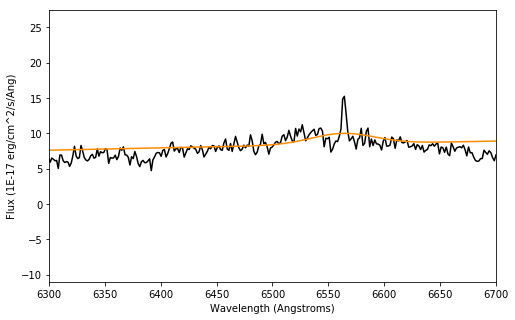

In [20]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit_fixed(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [21]:
print(compound_fit_fixed)

Model: CompoundModel1
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=6563., stddev=10.)>

    [1]: <Polynomial1D(1, c0=0., c1=0.)>
Parameters:
       amplitude_0     mean_0 ...         c0_1                 c1_1        
    ------------------ ------ ... ------------------- ---------------------
    1.5325747104561047 6563.0 ... -12.791030002605362 0.0032374486280527695


We can see in the plot that the height of the fit does not match the $H\alpha$ line height. What happend here is that we were too strict with the mean value, so we did not get a good fit. But the mean value is where we want it! Let's loose this condition a little. Another thing we can do is to define a [**minimum and maximum value**](http://docs.astropy.org/en/stable/api/astropy.modeling.Parameter.html#astropy.modeling.Parameter.max) for the mean.

In [22]:
compound_model_bounded = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
delta = 0.5
compound_model_bounded.mean_0.max = 6563 + delta
compound_model_bounded.mean_0.min = 6563 - delta

fitter = fitting.LevMarLSQFitter()
compound_fit_bounded = fitter(compound_model_bounded, lam, flux)

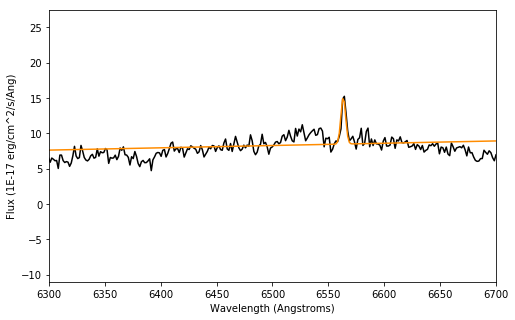

In [23]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit_bounded(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [24]:
print(compound_fit_bounded)

Model: CompoundModel2
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=6563., stddev=10.)>

    [1]: <Polynomial1D(1, c0=0., c1=0.)>
Parameters:
       amplitude_0    mean_0 ...         c0_1                 c1_1        
    ----------------- ------ ... ------------------- ---------------------
    6.657305067408649 6563.5 ... -12.793362542046482 0.0032399500252079877


Better! By loosing the condition we added to the mean value, we got a better fit and the mean of the gaussian is closer to where we want it.

## Exercise
Modify the value of delta to change the minimum and maximum values for the mean of the gaussian. Look for:
* The better delta so the mean is closer to the real value of the $H\alpha$ line.
* What is the minimum delta for which the fit is still good according to the plot?

# Custom model

What should you do if you need a model that `astropy.modeling` doesn't provide? To solve that problem, Astropy has another tool called [custom model](http://docs.astropy.org/en/stable/modeling/new.html). Using this tool, we can create any model we want. 

We will describe two way to create a custom model: 
* [basic](http://docs.astropy.org/en/stable/modeling/new.html#basic-custom-models)  
* [full](http://docs.astropy.org/en/stable/modeling/new.html#a-step-by-step-definition-of-a-1-d-gaussian-model)

We use the basic custom model when we need a simple function to fit and the full custom model when we need a more complex function. Let's use an example to understand each one of the custom models.

## Basic custom model

An **Exponential Model** is no provided by Astropy models. Let's see one example of basic custom model for this case. First, let's simulate a dataset that follows an exponential:

In [25]:
x1 = np.linspace(0,10,100)

a = 3
b = -2
c = 0
y1 = a*np.exp(b*x1+c)
y1 += np.random.normal(0., 0.2, x1.shape)
y1_err = np.ones(x1.shape)*0.2

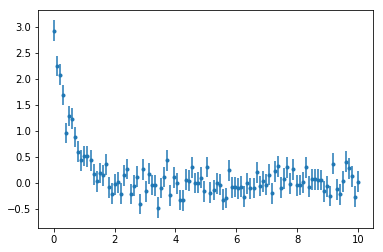

In [26]:
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.show()

We can define a simple custom model by specifying which parameters we want to fit.

In [27]:
@custom_model
def exponential(x, a=1., b=1., c=1.):
    '''
    f(x)=a*exp(b*x + c)
    '''
    return a*np.exp(b*x+c)

Now we have one more available model to use in the same way we always fit data. 

In [28]:
exp_model = exponential(1.,-1.,1.)  
fitter = fitting.LevMarLSQFitter()
exp_fit = fitter(exp_model, x1, y1, weights = 1.0/y1_err**2)

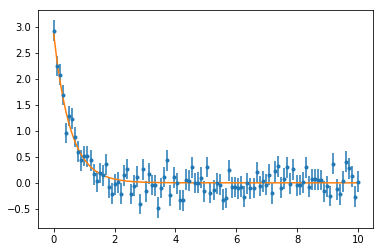

In [29]:
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.plot(x1, exp_fit(x1))
plt.show()

In [30]:
print(exp_fit)

Model: exponential
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
            a                   b                  c         
    ------------------ ------------------- ------------------
    1.3221630600191585 -1.8415466004307253 0.7771231057959449


The fit looks good in the plot. Let's check the parameters and the Reduced Chi Square value, which will give us information about the goodness of the fit.

In [31]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [32]:
calc_reduced_chi_square(exp_fit(x1), x1, y1, y1_err, len(x1), 3)

0.9451150678329252

The Reduced Chi Square value is close to 1. Great! This means our fit is good, and we can corroborate it by comparing the values we got for the parameters and the ones we used to simulate the data.

**Note:** Fits of non-linear parameters (like in our example) are extremely dependent on initial conditions. Pay attention to the initial conditions you select.

## Exercise
Modify the initial conditions of the fit and check yourself the dependance of the non-linear paramaters. You can check it by looking at the Reduced Chi Square value: if it gets closer to 1 the fit is better and vice versa. To compare the fits you can take note of the Reduced Chi Square value you get for each initial condition.

## Full custom model

What if we want to use a model from `astropy.modeling`, but with a different set of parameters? One example is the [Sine Model](http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Sine1D.html#astropy.modeling.functional_models.Sine1D). It has a very particular definition of the frequency and phase. Let's see an exaple for the full custom model. Again, first let's create a simulated dataset.

In [33]:
x2 = np.linspace(0,10,100)
a = 3
b = 2
c = 4
d = 1
y2 = a*np.sin(b*x2+c)+d
y2 += np.random.normal(0., 0.5, x2.shape)
y2_err = np.ones(x2.shape)*0.3

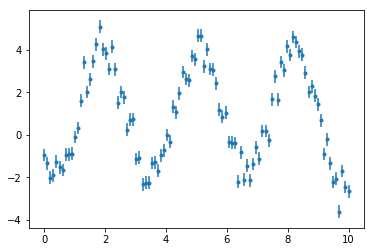

In [34]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='.')
plt.show()

For this case we will define a full model to be able to choose the parameters we want to fit. In this type of custom model we can set the **derivative of the function**, which is used by different fitters. 

Fitters that use derivative:
* ...

In [35]:
class sine_new(Fittable1DModel):
    a = Parameter()
    b = Parameter()
    c = Parameter()
    d = Parameter()
        
    @staticmethod
    def evaluate(x, a, b, c, d):
        return a*np.sin(b*x+c)+d
    
    @staticmethod
    def fit_deriv(x, a, b, c, d):
        d_a = np.sin(b*x+c)+d
        d_b = a*np.cos(b*x+c)*x
        d_c = a*np.sin(b*x+c)
        d_d = np.ones(x.shape)
        return [d_a, d_b, d_c, d_d]

Same way as always, we are going to fit the data with our **new model**. Once more, the fit is very **sensitive to the initial conditions** due to the non-linearity of the parameters.

In [36]:
sine_model = sine_new(a=4.,b=2.,c=4.,d=0.)  
fitter = fitting.LevMarLSQFitter()
sine_fit = fitter(sine_model, x2, y2, weights = 1.0/y2_err**2)

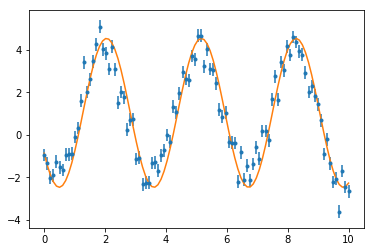

In [37]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='.')
plt.plot(x2,sine_fit(x2))
plt.show()

In [38]:
print(sine_fit)

Model: sine_new
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            a                  b                  c                 d         
    ------------------ ------------------ ----------------- ------------------
    3.5149381303979244 2.0186168190729683 3.714206247918291 1.0391132497698146


In [39]:
calc_reduced_chi_square(sine_fit(x2), x2, y2, y2_err, len(x2), 3)

7.029186805386363

The Reduced Chi Squared value is showing the same as the plot: this fit could be improved. The Reduced Chi Squared is not close to 1 and the fit is off by small phase.

## Exercise
Play with the initial values for the last fit and improve the Reduced Chi Squared value. 

**Note:** A fancy way of doing this would be to code a function which iterates over different initial conditions, optimizing the Reduced Chi Squared value. No need to do it here, but feel free to try.

## Exercise

Custom models are also useful when we want to fit an **unusual function** to our data. As an example, create a full custom model to fit the following data.

In [40]:
x3 = np.linspace(-2,3,100)
y3 = x3**2* np.exp(-0.5 * (x3)**3 / 2**2)
y3 += np.random.normal(0., 0.5, x3.shape)
y3_err = np.ones(x3.shape)*0.5

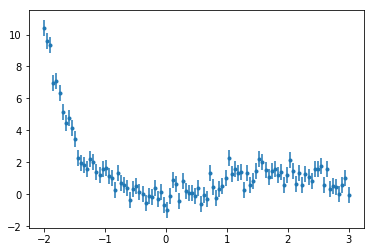

In [41]:
plt.errorbar(x3,y3,yerr=y3_err,fmt='.')
plt.show()